<a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/binhojulix/machine-learning-credit-scoring/main/base_dados_traduzida.csv'
dados = pd.read_csv(url)
dados.head()

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

In [5]:
linhas = dados.shape[0]
colunas = dados.shape[1]

print('A base de dados tem %s linhas e %s colunas.' %(linhas, colunas))

A base de dados tem 1000 linhas e 21 colunas.


In [6]:
duplicados = dados.duplicated()
duplicados = duplicados.sum()

print('A base de dados tem %s dados duplicados.' %(duplicados))

A base de dados tem 0 dados duplicados.


In [7]:
nulos = dados.isnull()
nulos.sum()

default                        0
conta_corrente                 0
prazo_emprestimo_meses         0
historico_credito              0
proposito_emprestimo           0
valor_emprestimo               0
reserva_cc                     0
tempo_emprego_atual            0
taxa_comp_salario              0
sexo_est_civil                 0
outros_fiadores                0
anos_residencia_atual          0
propriedade                    0
idade                          0
outros_planos_financiamento    0
tipo_residencia                0
n_creditos_banco               0
status_emprego                 0
n_dependentes                  0
telefone                       0
trabalhador_estrangeiro        0
dtype: int64

In [8]:
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [9]:
y = dados['default']
y.head()

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int64

In [10]:
x = dados.drop(columns = 'default')
x.head()

,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [11]:
from sklearn.model_selection import train_test_split

SEED = 77
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.30, random_state = SEED)

base_treino = treino_x.shape[0]
base_teste = teste_x.shape[0]

print('A base de treino tem %s elementos e a base de teste tem %s elementos.' %(base_treino, base_teste))

A base de treino tem 700 elementos e a base de teste tem 300 elementos.


In [12]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=1000)
modelo.fit(treino_x, treino_y) 

ValueError: ignored

In [13]:
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [14]:
dados['conta_corrente'].unique()

array(['< 0 DM', '0 <= ... < 200 DM', 'no checking account',
       '>= 200 DM / salary assignments for at least 1 year'], dtype=object)

In [15]:
#verifica strings da variavel 'conta_corrente'
dados['conta_corrente'].unique()

array(['< 0 DM', '0 <= ... < 200 DM', 'no checking account',
       '>= 200 DM / salary assignments for at least 1 year'], dtype=object)

In [16]:
#mudando categoria variavel 'conta_corrente'

a = { 'no checking account' : 4,
      '>= 200 DM / salary assignments for at least 1 year' : 3,
      '0 <= ... < 200 DM' : 2,
      '< 0 DM' : 1     
}
dados['conta_corrente'] = dados['conta_corrente'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,4,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [17]:
#mudando categoria variavel 'historico_credito'

a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5     
}
dados['historico_credito'] = dados['historico_credito'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,3,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,4,12,5,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,3,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,4,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [18]:
#mudando categoria variavel 'proposito_emprestimo'

a = { 'car (new)' : 1,
      'car (used)' : 2,
      'furniture/equipment' : 3,
      'radio/television' : 4,
      'domestic appliances' : 5,
      'repairs' : 6,
      'education' : 7,
      '(vacation - does not exist?)' : 8,
      'retraining' : 9,
      'business' : 10,
      'others' : 11
}
dados['proposito_emprestimo'] = dados['proposito_emprestimo'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,3,5,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,4,12,5,8,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,3,4,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,4,1,4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [19]:
#mudando categoria variavel 'reserva_cc'

a = { 'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5     
}
dados['reserva_cc'] = dados['reserva_cc'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,3,5,5951,5,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,4,12,5,8,2096,5,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,3,4,7882,5,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,4,1,4870,5,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [20]:
#mudando categoria variavel 'tempo_emprego_atual'

a = { '.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5     
}
dados['tempo_emprego_atual'] = dados['tempo_emprego_atual'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,1,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,3,5,5951,5,3,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,4,12,5,8,2096,5,2,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,3,4,7882,5,2,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,4,1,4870,5,3,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [21]:
#mudando categoria variavel 'sexo_est_civil'

a = { 'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5     
}
dados['sexo_est_civil'] = dados['sexo_est_civil'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,1,4,3,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,3,5,5951,5,3,2,2,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,4,12,5,8,2096,5,2,2,3,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,3,4,7882,5,2,2,3,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,4,1,4870,5,3,3,3,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [22]:
#mudando categoria variavel 'outros_fiadores'

a = { 'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3    
}
dados['outros_fiadores'] = dados['outros_fiadores'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,1,4,3,1,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,3,5,5951,5,3,2,2,1,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,4,12,5,8,2096,5,2,2,3,1,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,3,4,7882,5,2,2,3,3,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,4,1,4870,5,3,3,3,1,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [23]:
#mudando categoria variavel 'propriedade'

a = { 'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4 
}
dados['propriedade'] = dados['propriedade'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,1,4,3,1,4,1,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,3,5,5951,5,3,2,2,1,2,1,22,none,own,1,skilled employee / official,1,none,yes
2,0,4,12,5,8,2096,5,2,2,3,1,3,1,49,none,own,1,unskilled - resident,2,none,yes
3,0,1,42,3,4,7882,5,2,2,3,3,4,2,45,none,for free,1,skilled employee / official,2,none,yes
4,1,1,24,4,1,4870,5,3,3,3,1,4,4,53,none,for free,2,skilled employee / official,2,none,yes


In [24]:
#mudando categoria variavel 'outros_planos_financiamento'

a = { 'bank' : 1,
      'stores' : 2,
      'none' : 3 
}

dados['outros_planos_financiamento'] = dados['outros_planos_financiamento'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,1,4,3,1,4,1,67,3,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,3,5,5951,5,3,2,2,1,2,1,22,3,own,1,skilled employee / official,1,none,yes
2,0,4,12,5,8,2096,5,2,2,3,1,3,1,49,3,own,1,unskilled - resident,2,none,yes
3,0,1,42,3,4,7882,5,2,2,3,3,4,2,45,3,for free,1,skilled employee / official,2,none,yes
4,1,1,24,4,1,4870,5,3,3,3,1,4,4,53,3,for free,2,skilled employee / official,2,none,yes


In [25]:
#mudando categoria variavel 'tipo_residencia'

a = { 'rent' : 1,
      'own' : 2,
      'for free' : 3 
}

dados['tipo_residencia'] = dados['tipo_residencia'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,1,4,3,1,4,1,67,3,2,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,3,5,5951,5,3,2,2,1,2,1,22,3,2,1,skilled employee / official,1,none,yes
2,0,4,12,5,8,2096,5,2,2,3,1,3,1,49,3,2,1,unskilled - resident,2,none,yes
3,0,1,42,3,4,7882,5,2,2,3,3,4,2,45,3,3,1,skilled employee / official,2,none,yes
4,1,1,24,4,1,4870,5,3,3,3,1,4,4,53,3,3,2,skilled employee / official,2,none,yes


In [26]:
#mudando categoria variavel 'status_emprego'

a = { 'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
}
dados['status_emprego'] = dados['status_emprego'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,1,4,3,1,4,1,67,3,2,2,3,1,"yes, registered under the customers name",yes
1,1,2,48,3,5,5951,5,3,2,2,1,2,1,22,3,2,1,3,1,none,yes
2,0,4,12,5,8,2096,5,2,2,3,1,3,1,49,3,2,1,2,2,none,yes
3,0,1,42,3,4,7882,5,2,2,3,3,4,2,45,3,3,1,3,2,none,yes
4,1,1,24,4,1,4870,5,3,3,3,1,4,4,53,3,3,2,3,2,none,yes


In [27]:
#mudando categoria variavel 'telefone'

a = { 'yes, registered under the customers name ' : 1,
      'none' : 0
}
dados['telefone'] = dados['telefone'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,1,4,3,1,4,1,67,3,2,2,3,1,1,yes
1,1,2,48,3,5,5951,5,3,2,2,1,2,1,22,3,2,1,3,1,0,yes
2,0,4,12,5,8,2096,5,2,2,3,1,3,1,49,3,2,1,2,2,0,yes
3,0,1,42,3,4,7882,5,2,2,3,3,4,2,45,3,3,1,3,2,0,yes
4,1,1,24,4,1,4870,5,3,3,3,1,4,4,53,3,3,2,3,2,0,yes


In [28]:
#mudando categoria variavel 'trabalhador_estrangeiro'

a = { 'yes' : 1,
      'no' : 0
}
dados['trabalhador_estrangeiro'] = dados['trabalhador_estrangeiro'].map(a)
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,1,4,3,1,4,1,67,3,2,2,3,1,1,1
1,1,2,48,3,5,5951,5,3,2,2,1,2,1,22,3,2,1,3,1,0,1
2,0,4,12,5,8,2096,5,2,2,3,1,3,1,49,3,2,1,2,2,0,1
3,0,1,42,3,4,7882,5,2,2,3,3,4,2,45,3,3,1,3,2,0,1
4,1,1,24,4,1,4870,5,3,3,3,1,4,4,53,3,3,2,3,2,0,1


In [30]:
y = dados['default']
x = dados.drop(columns = 'default')

In [31]:
SEED = 77
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.30, random_state=SEED)

base_treino = treino_x.shape[0]
base_teste = teste_x.shape[0]

print('A base de treino tem %s elementos e a base de teste tem %s elementos.' %(base_treino, base_teste))

A base de treino tem 700 elementos e a base de teste tem 300 elementos.


In [32]:
modelo = LogisticRegression(max_iter=1000)
modelo.fit(treino_x, treino_y)
print(modelo.score(treino_x, treino_y))

0.7457142857142857


In [33]:
previsoes = modelo.predict(teste_x)
previsoes

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(teste_y, previsoes)
acuracia = round(acuracia, 3)*100
acuracia

80.7

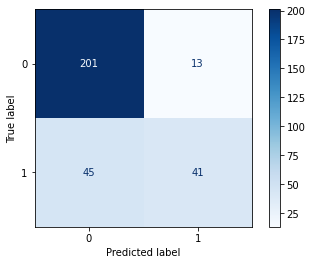

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

matriz_confusao = plot_confusion_matrix(modelo, teste_x, teste_y, cmap='Blues', values_format = '.3g')
matriz_confusao   

In [36]:
from sklearn.metrics import classification_report

print(classification_report(teste_y, previsoes))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       214
           1       0.76      0.48      0.59        86

    accuracy                           0.81       300
   macro avg       0.79      0.71      0.73       300
weighted avg       0.80      0.81      0.79       300



roc_auc 0.819441425777005


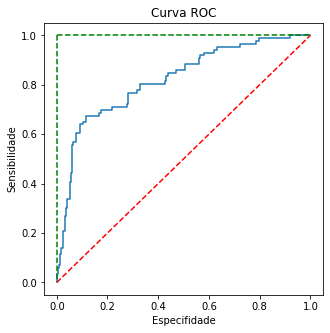

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

prob_previsao = modelo.predict_proba(teste_x)[:,1]

#tfp = taxa falsos positivos
#tvp = taxa verdadeiros positivos

tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
print('roc_auc', roc_auc_score(teste_y, prob_previsao))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

#area > 0.8, entao discriminacao excelente

In [38]:
variaveis_analise = ['sexo_est_civil', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo', 'default']
dados[variaveis_analise].describe()

,sexo_est_civil,idade,prazo_emprestimo_meses,valor_emprestimo,default
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.68200,35.546000,20.903000,3271.258000,0.300000
std,0.70808,11.375469,12.058814,2822.736876,0.458487
min,1.00000,19.000000,4.000000,250.000000,0.000000
25%,2.00000,27.000000,12.000000,1365.500000,0.000000
50%,3.00000,33.000000,18.000000,2319.500000,0.000000
75%,3.00000,42.000000,24.000000,3972.250000,1.000000
max,4.00000,75.000000,72.000000,18424.000000,1.000000


In [39]:
#homem = categorias 1, 3, 4
#mulher = categorias 2, 5

dados['sexo_est_civil'].value_counts()

3    548
2    310
4     92
1     50
Name: sexo_est_civil, dtype: int64

In [40]:
dados['default'].value_counts()

0    700
1    300
Name: default, dtype: int64

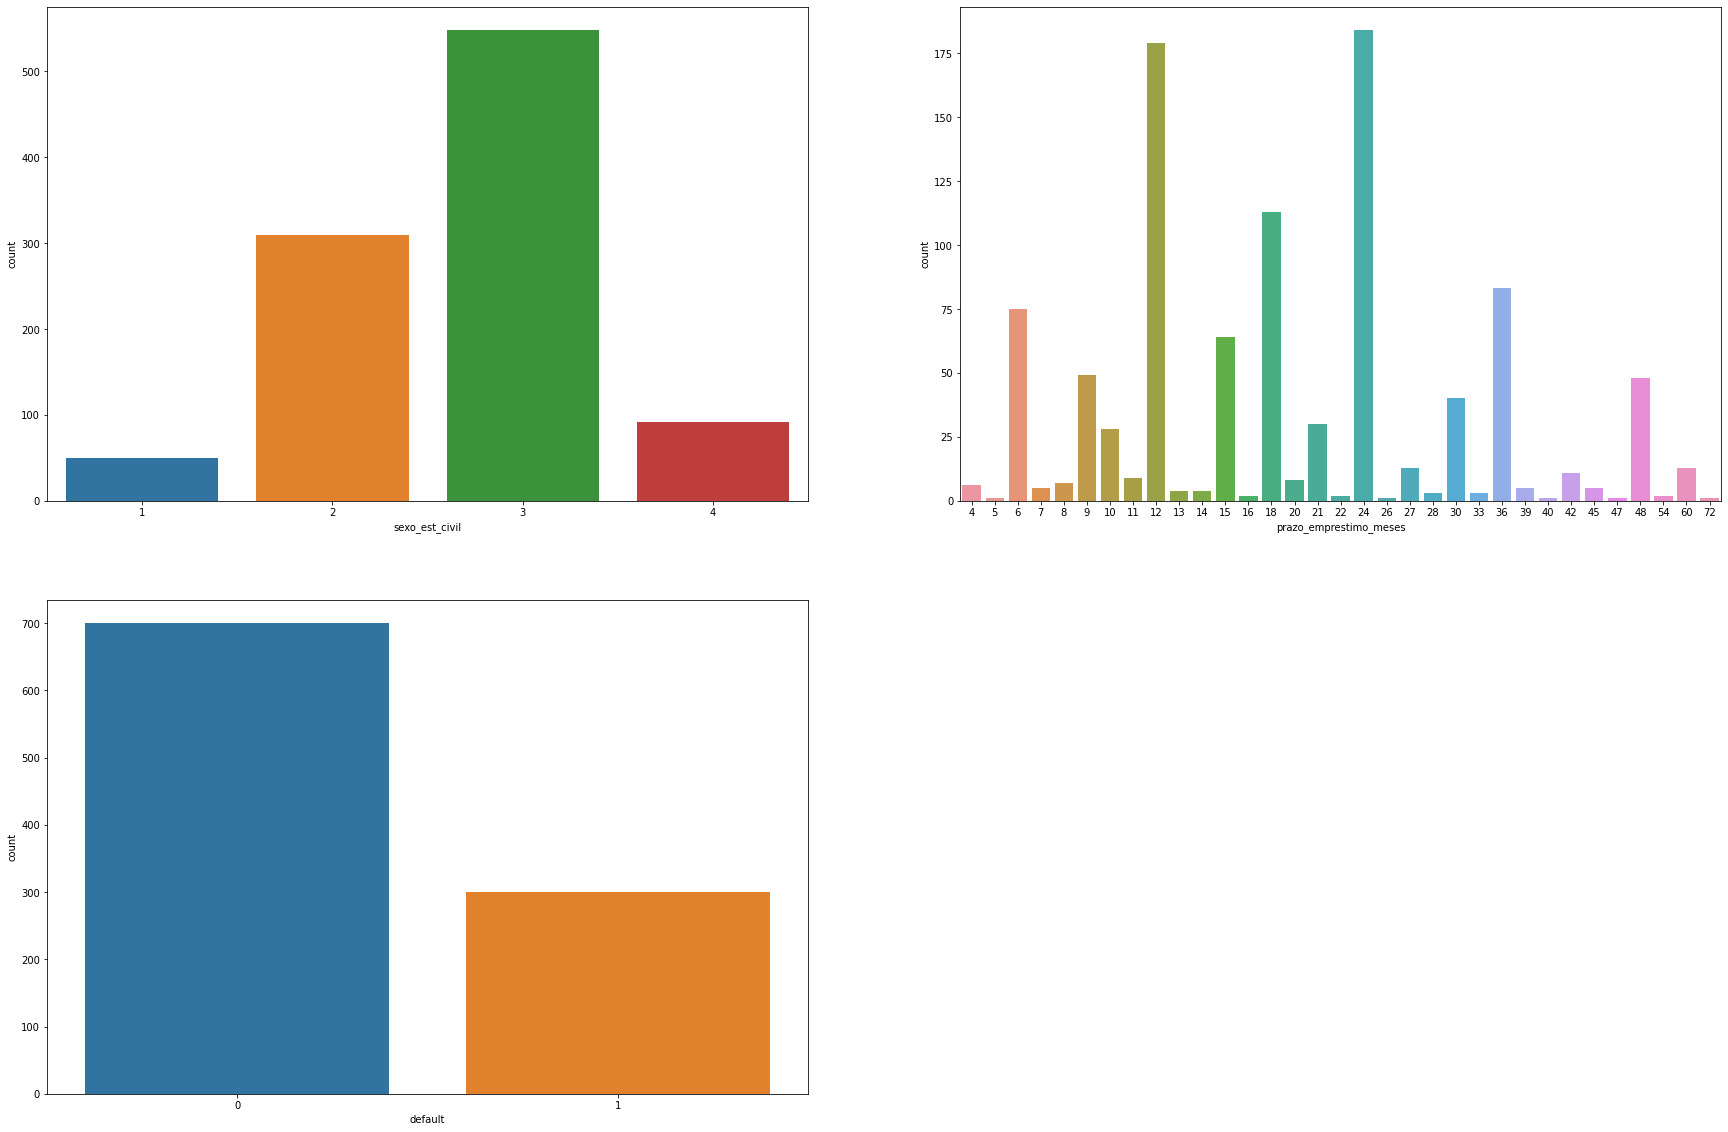

In [41]:
import seaborn as sns

histogramas = ['sexo_est_civil', 'prazo_emprestimo_meses', 'default']

lista_histogramas = list(enumerate(histogramas))

plt.figure(figsize = (30,20))

for i in lista_histogramas:
    plt.subplot(2, 2, i[0]+1)
    sns.countplot(x = i[1], data = dados)

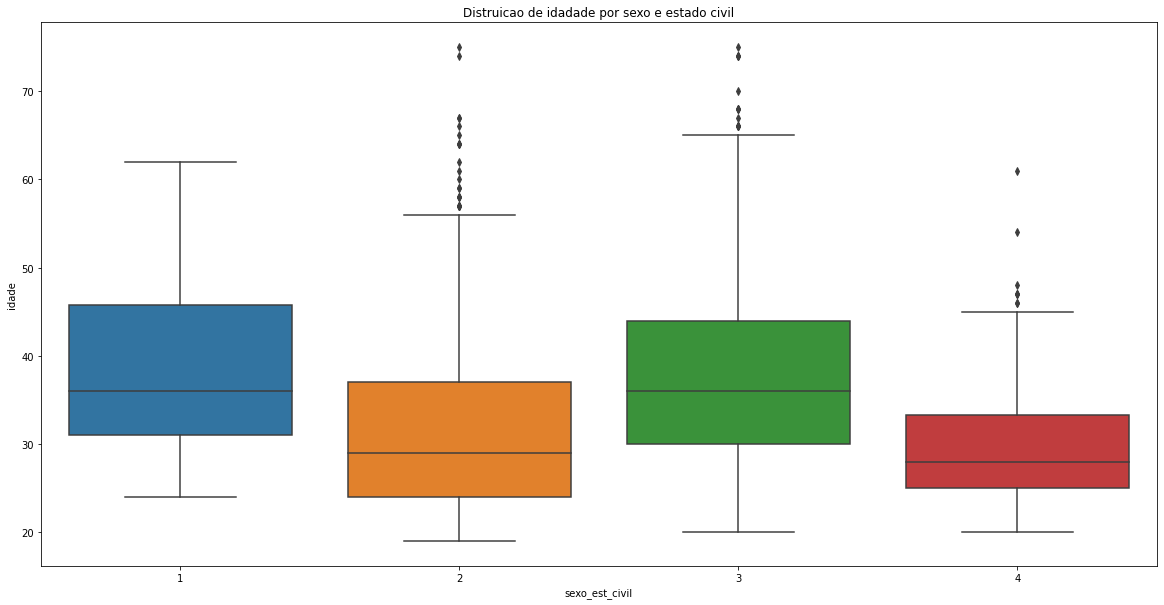

In [42]:
plt.figure(figsize = (20,10))

sns.boxplot(x = 'sexo_est_civil', y = 'idade', data = dados)
plt.title('Distruicao de idadade por sexo e estado civil')

plt.show()

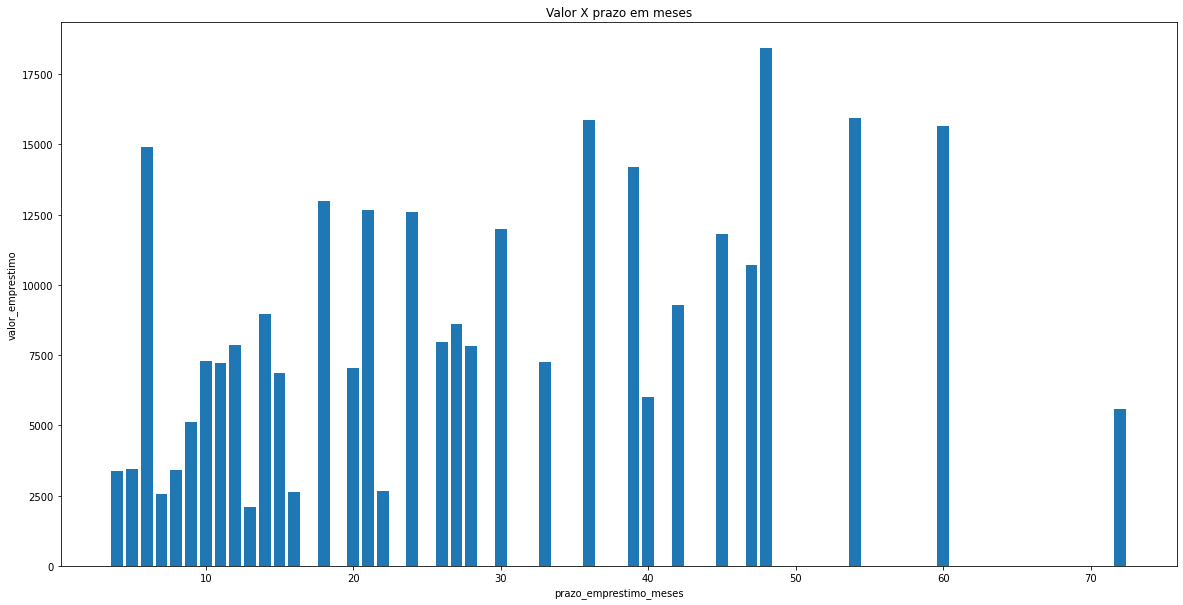

In [43]:
plt.figure(figsize = (20,10))

plt.bar(dados.prazo_emprestimo_meses, dados.valor_emprestimo)

plt.xlabel('prazo_emprestimo_meses')
plt.ylabel('valor_emprestimo')
plt.title('Valor X prazo em meses')

plt.show()

In [44]:
#categorias da variavel 'sexo_est_civil'

#male : divorced/separated = 1
#female : divorced/separated/married = 2
#male : single = 3
#male : married/widowed = 4
#female : single = 5

#criando a variavel 'sexo'

## 1 = mulher
## 0 = homem

#criando a variavel 'estado_civil'
## 1 = solteira
## 0 = casada/divorciada/viúva

dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}

dados['sexo'] = dados['sexo_est_civil'].map(dic_sexo)
dados['estado_civil'] = dados['sexo_est_civil'].map(dic_est_civil)

dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil
0,0,1,6,5,5,1169,1,1,4,3,1,4,1,67,3,2,2,3,1,1,1,0,1
1,1,2,48,3,5,5951,5,3,2,2,1,2,1,22,3,2,1,3,1,0,1,1,0
2,0,4,12,5,8,2096,5,2,2,3,1,3,1,49,3,2,1,2,2,0,1,0,1
3,0,1,42,3,4,7882,5,2,2,3,3,4,2,45,3,3,1,3,2,0,1,0,1
4,1,1,24,4,1,4870,5,3,3,3,1,4,4,53,3,3,2,3,2,0,1,0,1


In [45]:
#funcao para retirar colunas da base de dados

colunas_retiradas = ['sexo_est_civil', 'sexo']
base_dados = dados.drop(columns=colunas_retiradas)
base_dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,estado_civil
0,0,1,6,5,5,1169,1,1,4,1,4,1,67,3,2,2,3,1,1,1,1
1,1,2,48,3,5,5951,5,3,2,1,2,1,22,3,2,1,3,1,0,1,0
2,0,4,12,5,8,2096,5,2,2,1,3,1,49,3,2,1,2,2,0,1,1
3,0,1,42,3,4,7882,5,2,2,3,4,2,45,3,3,1,3,2,0,1,1
4,1,1,24,4,1,4870,5,3,3,1,4,4,53,3,3,2,3,2,0,1,1


In [46]:
#funcao 'roda_modelo': ajuste a validacao

def roda_modelo(base_dados, classificador):

#separando a base de modelagem e variavel resposta

    y = base_dados['default']
    x = base_dados.drop(columns='default')

#separando a base de treino e teste

    SEED = 77
    treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.30, random_state = SEED)

    base_treino = treino_x.shape[0]
    base_teste = teste_x.shape[0]
    print('A base de treino tem %s elementos e a base de teste tem %s elementos.' %(base_treino, base_teste))
    print(100*'-')

#ajustamdo modelo com base de teste
    
    modelo = classificador
    modelo.fit(treino_x, treino_y)

#-------------------------------------------------------------------------------------------------------------------------------------

#matriz de confusao

    matriz_confusao = plot_confusion_matrix(modelo, teste_x, teste_y, values_format = '.3g', cmap = 'Blues')
    plt.title('Matriz de Confusao')
    plt.show

#classification report

    previsoes = modelo.predict(teste_x)

    print('\nClassification Report:')
    print(classification_report(teste_y, previsoes))

#curva ROC  e AUC

    print(100*'-')
    prob_previsao = modelo.predict_proba(teste_x)[:,1]
   
    tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
    print('roc_auc:', roc_auc_score(teste_y, prob_previsao))
    
    plt.subplots(1, figsize=(5,5))
    plt.title('Curva ROC')
    plt.plot(tfp, tvp)
    plt.plot([0, 1], ls="--", c = 'red') #plotando linha pontilhada guia para regressao aleatoria
    plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha pontilhada guia para regressao perfeita
    plt.ylabel('Sensibilidade')
    plt.xlabel('Especificidade')
    plt.show() 

    return modelo, matriz_confusao

A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       214
           1       0.77      0.48      0.59        86

    accuracy                           0.81       300
   macro avg       0.80      0.71      0.73       300
weighted avg       0.81      0.81      0.79       300

----------------------------------------------------------------------------------------------------
roc_auc: 0.8105303194957618


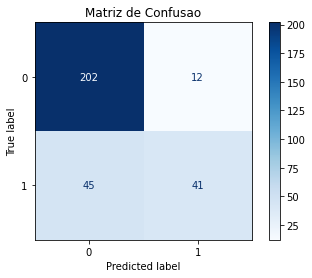

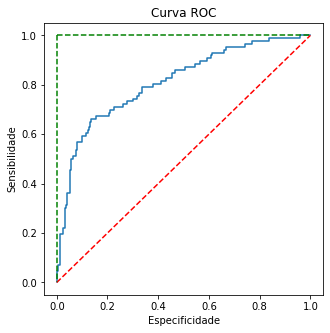

(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f418ea6d090>)

In [47]:
roda_modelo(base_dados, LogisticRegression(max_iter=1000))

In [48]:
dados['faixa_idade'] = pd.cut(x = dados['idade'], bins=[18, 30, 40, 50, 60, 70, 80], labels = [1, 2, 3, 4, 5, 6])
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil,faixa_idade
0,0,1,6,5,5,1169,1,1,4,3,1,4,1,67,3,2,2,3,1,1,1,0,1,5
1,1,2,48,3,5,5951,5,3,2,2,1,2,1,22,3,2,1,3,1,0,1,1,0,1
2,0,4,12,5,8,2096,5,2,2,3,1,3,1,49,3,2,1,2,2,0,1,0,1,3
3,0,1,42,3,4,7882,5,2,2,3,3,4,2,45,3,3,1,3,2,0,1,0,1,3
4,1,1,24,4,1,4870,5,3,3,3,1,4,4,53,3,3,2,3,2,0,1,0,1,4


In [49]:
dados['faixa_prazo_emprestimo'] = pd.cut(x = dados['prazo_emprestimo_meses'], bins=[1, 12, 24, 36, 48, 60, 72], labels = [1, 2, 3, 4, 5, 6])
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil,faixa_idade,faixa_prazo_emprestimo
0,0,1,6,5,5,1169,1,1,4,3,1,4,1,67,3,2,2,3,1,1,1,0,1,5,1
1,1,2,48,3,5,5951,5,3,2,2,1,2,1,22,3,2,1,3,1,0,1,1,0,1,4
2,0,4,12,5,8,2096,5,2,2,3,1,3,1,49,3,2,1,2,2,0,1,0,1,3,1
3,0,1,42,3,4,7882,5,2,2,3,3,4,2,45,3,3,1,3,2,0,1,0,1,3,4
4,1,1,24,4,1,4870,5,3,3,3,1,4,4,53,3,3,2,3,2,0,1,0,1,4,2


In [50]:
colunas_retiradas = ['sexo_est_civil', 'sexo', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo']
base_dados = dados.drop(columns=colunas_retiradas)
base_dados.head()

,default,conta_corrente,historico_credito,proposito_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,estado_civil,faixa_idade,faixa_prazo_emprestimo
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,1,5,1
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,0,1,4
2,0,4,5,8,5,2,2,1,3,1,3,2,1,2,2,0,1,1,3,1
3,0,1,3,4,5,2,2,3,4,2,3,3,1,3,2,0,1,1,3,4
4,1,1,4,1,5,3,3,1,4,4,3,3,2,3,2,0,1,1,4,2


A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       214
           1       0.74      0.49      0.59        86

    accuracy                           0.80       300
   macro avg       0.78      0.71      0.73       300
weighted avg       0.80      0.80      0.79       300

----------------------------------------------------------------------------------------------------
roc_auc: 0.7983047163660074


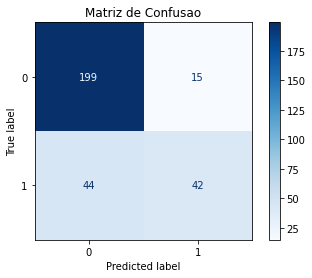

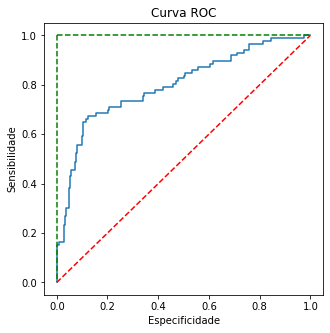

(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f418de63e10>)

In [51]:
roda_modelo(base_dados, LogisticRegression(max_iter=1000))

In [52]:
colunas_retiradas = ['sexo_est_civil', 'sexo', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo']
base_dados = dados.drop(columns=colunas_retiradas)
base_dados.head()

,default,conta_corrente,historico_credito,proposito_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,estado_civil,faixa_idade,faixa_prazo_emprestimo
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,1,5,1
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,0,1,4
2,0,4,5,8,5,2,2,1,3,1,3,2,1,2,2,0,1,1,3,1
3,0,1,3,4,5,2,2,3,4,2,3,3,1,3,2,0,1,1,3,4
4,1,1,4,1,5,3,3,1,4,4,3,3,2,3,2,0,1,1,4,2


In [53]:

modelo = LogisticRegression(max_iter=1000)
y = base_dados['default']
x= base_dados.drop(columns = 'default')
modelo.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
print(x)

     conta_corrente  historico_credito  ...  faixa_idade  faixa_prazo_emprestimo
0                 1                  5  ...            5                       1
1                 2                  3  ...            1                       4
2                 4                  5  ...            3                       1
3                 1                  3  ...            3                       4
4                 1                  4  ...            4                       2
..              ...                ...  ...          ...                     ...
995               4                  3  ...            2                       1
996               1                  3  ...            2                       3
997               4                  3  ...            2                       1
998               1                  3  ...            1                       4
999               2                  5  ...            1                       4

[1000 rows x 19 columns]
